In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [91]:
df1 = pd.read_csv("data/national-gdp-penn-world-table.csv")
df2 = pd.read_csv("data/homicide-rate-unodc.csv")
df3 = pd.read_csv("data/population.csv")

# Get 2020 data
df1 = df1[df1["Year"] == 2019]
df2 = df2[df2["Year"] == 2019]
df3 = df3[df3["Year"] == 2019]

# Join 1, 2, 3, on Entity
df = df1.merge(df2, on="Entity").merge(df3, on="Entity")

In [92]:
x_axis = df["GDP (output, multiple price benchmarks)"]
y_axis = df["Homicide rate per 100,000 population - Both sexes - All ages"]
population = df["Population (historical estimates)"]

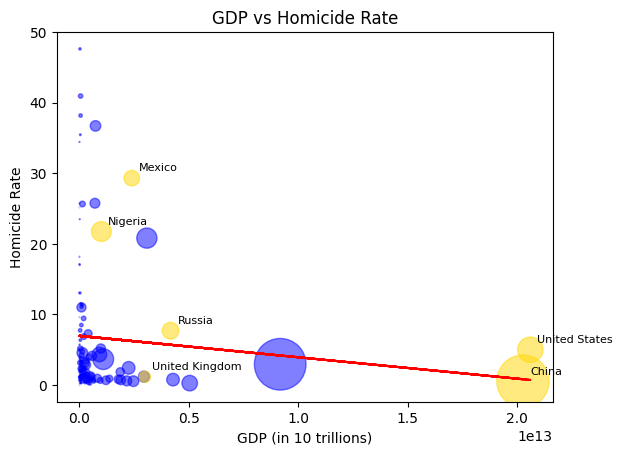

In [122]:
points_of_interest = ["United States", "United Kingdom", "Russia", "China", "Iran", "Mexico", "Nigeria"]

# Make text in points_of_interest gold
colors = []
for country in df["Entity"]:
    if country in points_of_interest:
        colors.append("gold")
    else:
        colors.append("blue")

# Plot, bigger dots for bigger populations
plt.scatter(x_axis, y_axis, c=colors, alpha=0.5, s=population/1000000)
# Add labels to dots
for i, txt in enumerate(df["Entity"]):
    if txt in points_of_interest:
        # Smaller text, slightly to right and up
        plt.annotate(txt, (x_axis[i], y_axis[i]), fontsize=8, xytext=(5, 5), textcoords='offset points')
        
plt.xlabel("GDP (in 10 trillions)")
plt.ylabel("Homicide Rate")
plt.title("GDP vs Homicide Rate")

# Add regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(x_axis, y_axis)
plt.plot(x_axis, intercept + slope*x_axis, 'r', label='fitted line')

plt.show()